In [1]:
import pandas as pd

final_db = pd.read_excel('Final formated DB.xlsx')
final_db = final_db.loc[final_db['Exclusion'] == 'No']
final_db = final_db.loc[final_db['Time point'] == 'M0']
final_db = final_db.set_index('Patient ID')

In [2]:
# Just to have everything at disposition to tweak if needed.
glucose_db = final_db.loc[final_db['Change of Insuline medication'] == 'NO']
cpept_db = glucose_db.loc[glucose_db['OGTT C peptide'] == 'Yes']
glu_db = glucose_db.loc[glucose_db['OGTT Glucose'] == 'Yes']
ins_db = glucose_db.loc[glucose_db['OGTT Insuline'] == 'Yes']

# Index correlations

In [3]:
# Some lists to make it easy to manipulate
Ins_indexes = ['Average Fasting Glucose','AUC Glucose', 'Trapezoid AUC Glucose', 'Corrected AUC Glucose',
               'HOMA ISI', 'Matsuda index','Stumvoll First Phase', 'Stumvoll Second Phase',
               'OGIS','IGI 30', 'IGI Cpept', 'CPRI', 'PCPRI',
               'Average Fasting Insulin', 'AUC Insuline', 'Trapezoid AUC Insuline', 'Corrected AUC Insuline',
               'Average Fasting C peptide', 'Trapezoid AUC C peptide','AUC C peptide', 'W/H ratio']
                
sec_indices = ['AUC Insuline','Trapezoid AUC Insuline', 'Corrected AUC Insuline',
               'AUC C peptide', 'Trapezoid AUC C peptide',
               'Average Fasting Insulin', 'Average Fasting C peptide',
               'Stumvoll First Phase', 'Stumvoll Second Phase',
               'IGI 30', 'IGI Cpept', 'CPRI', 'PCPRI', 'W/H ratio']
sensitivity_indices = ['AUC Glucose', 'Average Fasting Glucose', 'Trapezoid AUC Glucose',
                       'Corrected AUC Glucose', 'HOMA ISI', 'Matsuda index', 'OGIS']

fasting_indices = ['Average Fasting Insulin','Average Fasting C peptide', 'Average Fasting Glucose',
                   'CPRI','HOMA ISI','HOMA IR']

OGTT_ins = ['AUC Insuline','Matsuda index','Stumvoll First Phase','Stumvoll Second Phase','OGIS','IGI 30'
           'Trapezoid AUC Insuline','Corrected AUC Insuline']
OGTT_cpept = ['AUC C peptide','IGI Cpept', 'PCPRI','Trapezoid AUC C peptide']
OGTT_glu = ['AUC Glucose','Corrected AUC Glucose']


import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

scatter_matrix(ins_db[Ins_indexes], figsize=(13,10))
plt.show()

<Figure size 1300x1000 with 441 Axes>

We have way too much comparaisons to look at them all one by one.

We want to find the best couples of index that illustrate the "hyperbolic relationship" between secretion of insulin and sensitivity

# Log(x) against y  r² approach

We calculate the r² the same manner Excel would do for logarythmic tendancy curve

For example for Matsuda against stumvoll:

C:\Users\Daph\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


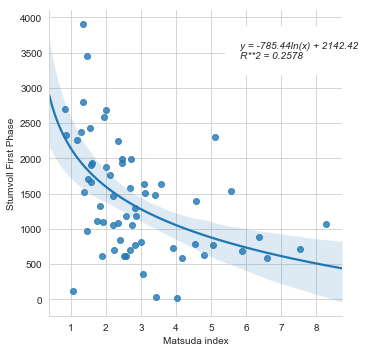

In [4]:
from analysis_script import correl_graph

correl_graph(ins_db, 'Matsuda index', 'Stumvoll First Phase')
plt.show()

We calculate here all those r-squared values for our desired variables

In [5]:
import scipy.stats
import numpy as np

def calculate_r_square_log_x(df, x, y):
    df = df[[x,y]].dropna()
    slope, intercept, r_value, d, e = scipy.stats.linregress(np.log(df[x]), df[y])
    return r_value**2

def log_r_square_df(df):
    r_df = pd.DataFrame(columns = df.columns, index= df.columns)
    for a in df.columns:
        for b in df.columns:
            if a == b: 
                r_df.loc[[a],[b]] = 1
            else:
                r_df.loc[[a],[b]] = calculate_r_square_log_x(df, a, b)
            
    return r_df

rsquare_df = log_r_square_df(ins_db[Ins_indexes])

We're not very interested to compare indices of the same "type" against each other but more to compare secretion against sensitivity. Let's clean our table: 

In [6]:
rsquare_df.drop(index = sec_indices, inplace = True)
rsquare_df.drop(columns = sensitivity_indices, inplace = True)

# Table of R-square
rsquare_df

,Stumvoll First Phase,Stumvoll Second Phase,IGI 30,IGI Cpept,CPRI,PCPRI,Average Fasting Insulin,AUC Insuline,Trapezoid AUC Insuline,Corrected AUC Insuline,Average Fasting C peptide,Trapezoid AUC C peptide,AUC C peptide,W/H ratio
Average Fasting Glucose,0.123894,0.0993243,0.113337,0.181056,0.0170959,0.0867891,0.0324824,0.0105057,0.0106172,0.0114551,0.0529634,0.0373226,0.050867,0.111022
AUC Glucose,0.116405,0.0905155,0.224189,0.351457,0.0011443,0.0564871,0.0143691,0.0239595,0.0222676,0.0194589,0.0351348,9.16504e-06,0.000542916,0.0523569
Trapezoid AUC Glucose,0.113281,0.0858327,0.240307,0.403308,0.000650356,0.0564871,0.0135907,0.0226047,0.0210171,0.0198065,0.0409344,8.37323e-05,0.00036256,0.0606988
Corrected AUC Glucose,0.113281,0.0858327,0.240307,0.403308,0.000650356,0.0564871,0.0135907,0.0226047,0.0210171,0.0198065,0.0409344,8.37323e-05,0.00036256,0.0606988
HOMA ISI,0.1897,0.212761,0.027058,0.044207,0.225271,0.000132409,0.845724,0.276768,0.275912,0.272434,0.353583,0.0121052,0.00597332,0.0500734
Matsuda index,0.257835,0.2908,0.0368279,0.0584086,0.223314,0.0230615,0.672861,0.599299,0.591571,0.591516,0.314292,0.105327,0.0737627,0.0365299
OGIS,0.00623012,0.0121801,0.00473018,0.0807458,0.0662913,0.0204005,0.202892,0.357927,0.356655,0.337662,0.210977,0.077292,0.0515772,0.046673


# Here we have a heatmap of R-squared value for a log relationship. 
It's centered around 0.2

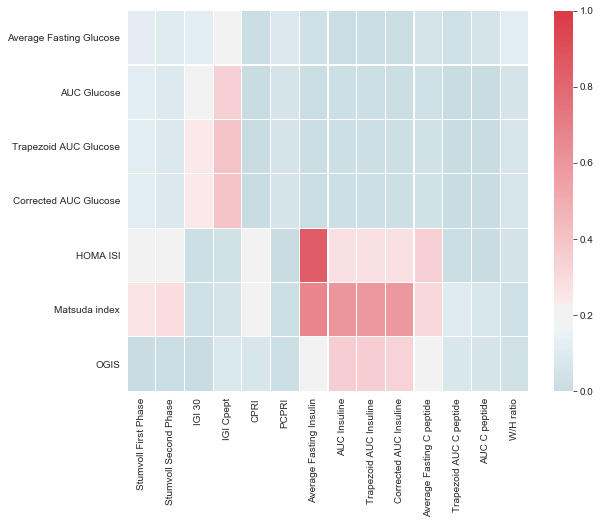

In [7]:
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.subplots(figsize=(9,7))
sns.heatmap(rsquare_df.values.tolist(), yticklabels=rsquare_df.index, xticklabels=rsquare_df.columns, 
            vmin=0, vmax=1, center=0.2, cmap=cmap, linewidths=.1)
plt.show()

# Spearman correlation

Spearman have for advantage to be able to capture logarythmic relationships

Take this example (taken from https://blog.bigml.com/2015/09/21/looking-for-connections-in-your-data-correlation-coefficients/)

With p being pearson and s being spearman correlation coefficient (not squared)

![ascombe quartet](image/anscombe.png)

## Spearman correlation table

In [8]:
# Function to have 2 DataFrame, one with the rho the other with p value
from analysis_script import spearman_p_value_DataFrame
spearman_p_value, corrspearman = spearman_p_value_DataFrame(ins_db[Ins_indexes])

In [9]:
corrspearman.drop(index = sec_indices, inplace = True)
corrspearman.drop(columns = sensitivity_indices, inplace = True)

In [10]:
corrspearman

,Stumvoll First Phase,Stumvoll Second Phase,IGI 30,IGI Cpept,CPRI,PCPRI,Average Fasting Insulin,AUC Insuline,Trapezoid AUC Insuline,Corrected AUC Insuline,Average Fasting C peptide,Trapezoid AUC C peptide,AUC C peptide,W/H ratio
Average Fasting Glucose,-0.280761,-0.268119,-0.308152,-0.434322,-0.0405602,-0.283601,0.127086,-0.182235,-0.18709,-0.192678,0.212054,-0.241506,-0.239788,0.254636
AUC Glucose,-0.210121,-0.180497,-0.367197,-0.475418,0.0607837,-0.228895,0.128779,0.15877,0.15094,0.142149,0.181504,0.0493824,0.0624091,0.249219
Trapezoid AUC Glucose,-0.207328,-0.175964,-0.372875,-0.50202,0.0796941,-0.173125,0.137021,0.155153,0.147781,0.140089,0.203894,0.084044,0.0957886,0.254142
Corrected AUC Glucose,-0.20696,-0.175595,-0.372619,-0.502289,0.0804487,-0.172848,0.137271,0.155815,0.148443,0.140751,0.204167,0.0842033,0.0959707,0.254551
HOMA ISI,-0.387408,-0.404579,-0.166392,0.142766,-0.444872,-0.0169872,-0.967857,-0.600824,-0.593864,-0.594322,-0.627564,-0.257143,-0.223855,-0.0623268
Matsuda index,-0.386905,-0.40783,-0.148901,0.143773,-0.391255,-0.0877289,-0.880861,-0.725321,-0.729304,-0.730769,-0.542537,-0.342628,-0.307509,-0.0695166
OGIS,0.107418,0.0889652,0.238919,0.364286,-0.0991758,0.148397,-0.43956,-0.377335,-0.379396,-0.381364,-0.37761,-0.122253,-0.114103,-0.151283


## Spearman correlogram

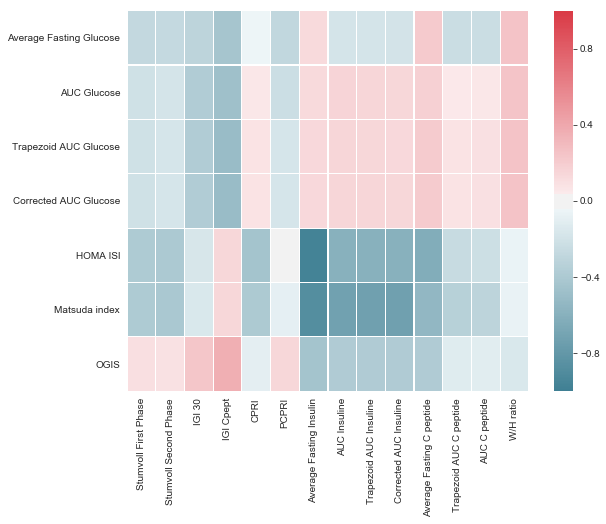

In [11]:
import seaborn as sns
plt.subplots(figsize=(9,7))
sns.heatmap(corrspearman.values.tolist(), yticklabels=corrspearman.index, xticklabels=corrspearman.columns, 
            vmin=-1, vmax=1, center=0, cmap=cmap, linewidths=.1)
plt.show()

## Let's get more Data!

With the previous calculation there is a problem. 

I just take a **subset of patient** (here, the patients, that i have the values for the insuline OGTT.)
This doesn't represent all datas i can use. For exemple, if i look at fasting values, the subset of patient i can perform the correlation is much higher, it includes patients, 
that have not performed an OGTT. Another problem is that if a patient have non calculated value (imagine, Fasting C peptide is missing but we have all the rest), i'd need to remove him only for the index taking it into account.

In [12]:
# I want to do correlation with the maximum of data possible.
import scipy.stats
lists = [Ins_indexes,OGTT_ins, OGTT_cpept, OGTT_glu]

def get_subset(lists, a):
    '''
    Get the subset the value is in
    '''
    if a in lists[1]:
        return ins_db[a]
    elif a in lists[2]:
        return cpept_db[a]
    else:
        return glu_db[a]
    
def correlator(df, lists, corr='spearman'):
    p_value_df = pd.DataFrame(columns = Ins_indexes, index= Ins_indexes)
    corrdf = pd.DataFrame(columns = Ins_indexes, index= Ins_indexes)
    
    big_list = lists[0]
    for a in big_list:
        for b in big_list:
            if a == b:
                p_value_df.loc[[a], [b]] = 1
                corrdf.loc[[a], [b]] = 1
            else:
                dummy_df = pd.concat([get_subset(lists, a),get_subset(lists, b)], axis=1,sort=False).dropna()
                _thearray = np.column_stack((dummy_df[a].tolist(), dummy_df[b].tolist()))
                
                # Pearson or spearman
                if corr=='spearman':
                    r, p = scipy. stats.spearmanr(_thearray)
                elif corr=='pearson':
                    r, p = scipy.stats.pearsonr(dummy_df[a].tolist(),dummy_df[b].tolist())
                else:
                    r, p = 1, 1
                    print('Invalid corr type')

                p_value_df.loc[[a], [b]] = p
                corrdf.loc[[a], [b]] = r
    return p_value_df, corrdf

## Spearman table

In [13]:
# I use the function to have spearman rho and their p values 
s_pvalues, spearman_table = correlator(final_db, lists)
spearman_table.drop(index = sec_indices, inplace = True)
spearman_table.drop(columns = sensitivity_indices, inplace = True)
spearman_table

,Stumvoll First Phase,Stumvoll Second Phase,IGI 30,IGI Cpept,CPRI,PCPRI,Average Fasting Insulin,AUC Insuline,Trapezoid AUC Insuline,Corrected AUC Insuline,Average Fasting C peptide,Trapezoid AUC C peptide,AUC C peptide,W/H ratio
Average Fasting Glucose,-0.3404,-0.327228,-0.38626,-0.509991,-0.179969,-0.37318,0.11355,-0.158307,-0.163547,-0.166872,0.160158,-0.264289,-0.306456,0.215258
AUC Glucose,-0.328852,-0.294795,-0.528273,-0.706293,-0.025069,-0.279665,0.136278,0.155526,0.146913,0.140215,0.186151,0.0111163,-0.022215,0.110661
Trapezoid AUC Glucose,-0.30241,-0.268671,-0.503141,-0.704774,-0.00913472,-0.279665,0.140692,0.175168,0.167311,0.162174,0.198331,0.0111163,-0.022215,0.102337
Corrected AUC Glucose,-0.30201,-0.268271,-0.502858,-0.705085,-0.00837912,-0.27931,0.140909,0.175896,0.168039,0.162902,0.198581,0.011343,-0.0219412,0.102504
HOMA ISI,-0.457324,-0.47541,-0.221682,0.148667,-0.503009,0.00452182,-0.974542,-0.597039,-0.589685,-0.589887,-0.622775,-0.1419,-0.103535,-0.232309
Matsuda index,-0.525472,-0.548488,-0.260074,0.148051,-0.465108,-0.121208,-0.913326,-0.803279,-0.792914,-0.795875,-0.555757,-0.296798,-0.255502,-0.186576
OGIS,-0.060628,-0.0830231,0.118878,0.313055,-0.213573,-0.0203463,-0.557569,-0.515699,-0.492811,-0.509086,-0.444452,-0.198268,-0.161883,-0.243171


## Spearman correlogram

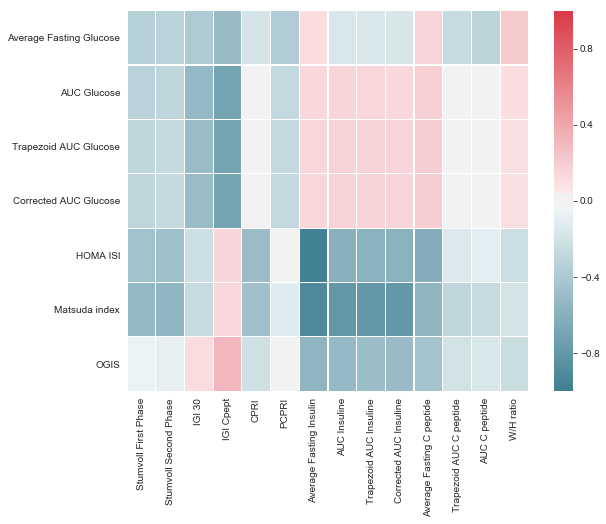

In [14]:
plt.subplots(figsize=(9,7))
sns.heatmap(spearman_table.values.tolist(), yticklabels=spearman_table.index, xticklabels=spearman_table.columns, 
            vmin=-1, vmax=1, center=0, cmap=cmap, linewidths=.1)
plt.show()

Let's visualise our p-values on the correlogram with usual * sign.

In [15]:
# Simple function (whynoswitchespythonthou)

def signifiance_sign(number):
    '''
    Transform p values into a simple sign string depending on their significance level
    '''
    if number is type(str): return number
    if number < 0.00005: return "****"
    if number < 0.0005: return "***"
    if number < 0.005: return "**"
    if number < 0.05: return "*"
    return ""

Cleaning the DataFrame

In [16]:
s_pvalues.drop(index = sec_indices, inplace = True)
s_pvalues.drop(columns = sensitivity_indices, inplace = True)
sign_df = s_pvalues.applymap(signifiance_sign)

## Spearman correlogram with p values

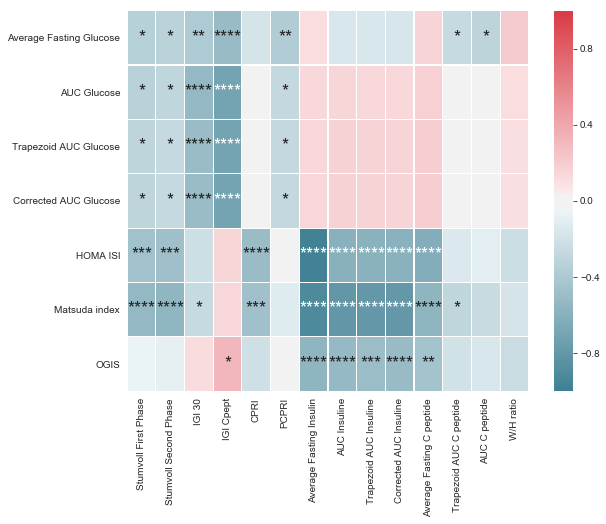

In [17]:
plt.subplots(figsize=(9,7))
sns.heatmap(spearman_table.values.tolist(), yticklabels=spearman_table.index, xticklabels=spearman_table.columns, 
            vmin=-1, vmax=1, center=0, cmap=cmap, linewidths=.1, fmt='',annot=sign_df, annot_kws={"size": 18})
plt.show()

## Spearman correlogram with corrected p values

In [18]:
from analysis_script import correct_p_values
# We recalculate everything but apply a holm correction on the pvalue table
s_pvalues, spearman_table = correlator(final_db, lists)
s_pvalues = correct_p_values(s_pvalues)
s_pvalues.drop(index = sec_indices, inplace = True)
s_pvalues.drop(columns = sensitivity_indices, inplace = True)
spearman_table.drop(index = sec_indices, inplace = True)
spearman_table.drop(columns = sensitivity_indices, inplace = True)
sign_df = s_pvalues.applymap(signifiance_sign)

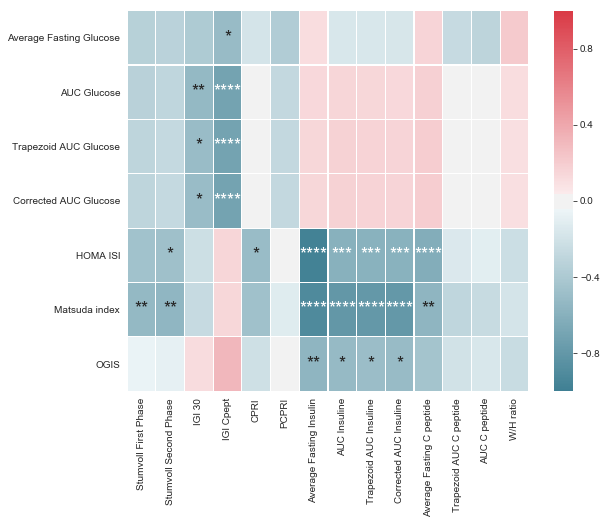

In [19]:
plt.subplots(figsize=(9,7))
sns.heatmap(spearman_table.values.tolist(), yticklabels=spearman_table.index, xticklabels=spearman_table.columns, 
            vmin=-1, vmax=1, center=0, cmap=cmap, linewidths=.1, fmt='',annot=sign_df, annot_kws={"size": 18})
plt.show()

# Pearson correlation

## Pearson correlation table with p-values

Let's start by calculating the values for the pearson correlation table: 

In [20]:
# Using the function i created earlier, removing unescessary entries and showing table
p_pvalues, pearson_table = correlator(final_db, lists, corr='pearson')
pearson_table.drop(index = sec_indices, inplace = True)
pearson_table.drop(columns = sensitivity_indices, inplace = True)
pearson_table

,Stumvoll First Phase,Stumvoll Second Phase,IGI 30,IGI Cpept,CPRI,PCPRI,Average Fasting Insulin,AUC Insuline,Trapezoid AUC Insuline,Corrected AUC Insuline,Average Fasting C peptide,Trapezoid AUC C peptide,AUC C peptide,W/H ratio
Average Fasting Glucose,-0.358661,-0.320208,-0.343811,-0.425577,-0.189492,-0.301308,0.134683,-0.102766,-0.102715,-0.107138,0.150565,-0.189272,-0.217652,0.271699
AUC Glucose,-0.405476,-0.361423,-0.514786,-0.608321,-0.0673643,-0.25987,0.0809671,0.0862866,0.0807543,0.0705563,0.154165,-0.00908034,-0.0277064,0.184693
Trapezoid AUC Glucose,-0.370982,-0.326168,-0.495275,-0.612705,-0.0609185,-0.25987,0.0822751,0.104423,0.0994503,0.0948071,0.159211,-0.00908034,-0.0277064,0.177939
Corrected AUC Glucose,-0.370982,-0.326168,-0.495275,-0.612705,-0.0609185,-0.25987,0.0822751,0.104423,0.0994503,0.0948071,0.159211,-0.00908034,-0.0277064,0.177939
HOMA ISI,-0.337463,-0.358814,-0.127649,0.200521,-0.487447,-0.0662443,-0.754675,-0.486461,-0.484054,-0.481311,-0.588644,-0.15191,-0.112864,-0.076271
Matsuda index,-0.435061,-0.462933,-0.165983,0.231039,-0.460551,-0.163888,-0.700155,-0.689454,-0.689943,-0.683953,-0.530726,-0.33319,-0.253827,-0.105881
OGIS,-0.0785386,-0.107919,0.113211,0.273324,-0.277151,-0.146749,-0.464922,-0.568961,-0.566792,-0.552005,-0.487201,-0.259934,-0.201508,-0.247584


## Pearson correlogram

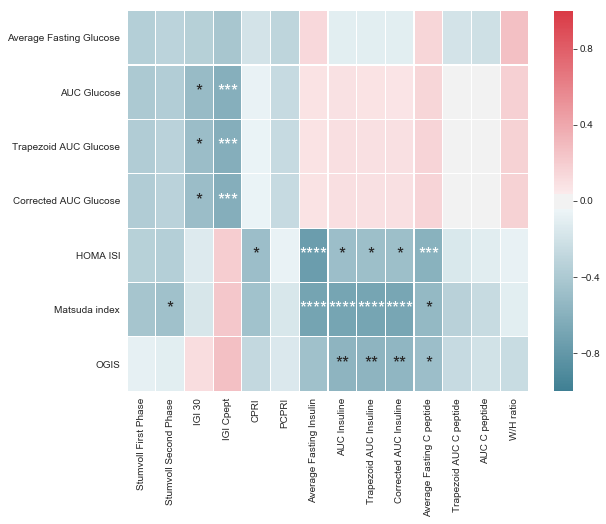

In [21]:
# Cleaning p values table 
p_pvalues = correct_p_values(p_pvalues)
p_pvalues.drop(index = sec_indices, inplace = True)
p_pvalues.drop(columns = sensitivity_indices, inplace = True)
sign_df = p_pvalues.applymap(signifiance_sign)

#Graph part
plt.subplots(figsize=(9,7))
sns.heatmap(pearson_table.values.tolist(), yticklabels=pearson_table.index, xticklabels=pearson_table.columns, 
            vmin=-1, vmax=1, center=0, cmap=cmap, linewidths=.1, fmt='',annot=sign_df, annot_kws={"size": 18})
plt.show()

# Does Matsuda correlation comes from autocorrelation

Matsuda formula is :

$$Matsuda \ index = \frac{10000}{\sqrt{(Ins_0*Glu_0)*(Ins_{mean}*Glu_{mean})}}$$

It is possible the correlation comes from Matsuda calculation. 

## Generating random datas

Here, i'm generating fake OGTT values and calculate their AUC and matsuda. 

In [22]:
# It's quick and dirty. 
random_ins_0 = np.random.randint(low = 3, high = 30, size=100)
random_glu_0 = np.random.randint(low = 72 , high = 200, size=100)


# Random AUCs
random_ins_list = []
auc_array = []

for i in range(4):
    random_ins_list.append(np.random.randint(low = 20, high = 380, size=100)) #Fake OGTT values

for counter, item in enumerate(random_ins_0): # AUC calc
    auc_array.append(np.trapz([item, random_ins_list[0][counter], random_ins_list[1][counter],
                               random_ins_list[2][counter], random_ins_list[3][counter]],
                              [0,30,60,90,120]))

# Random average  
random_ave_glu = np.random.randint(low = 78 , high = 407, size=100)
random_ave_ins = np.random.randint(low = 20 , high = 380, size=100)

# Preparing the DataFrame and calculating Matsuda 
fake_df = pd.DataFrame(data = {"ins0": random_ins_0, 'glu0': random_glu_0, 
                               "glu ave": random_ave_glu, "ins ave": random_ave_ins})
fake_df['Auc'] = auc_array
                               
fake_df['Matsuda'] = 10000/(np.sqrt(np.multiply(np.multiply(fake_df["ins0"],fake_df["glu0"]),
                                    np.multiply(fake_df["glu ave"],fake_df["ins ave"]))))

### Random OGTT table

In [23]:
fake_df.head()

,ins0,glu0,glu ave,ins ave,Auc,Matsuda
0,5,185,126,283,30450.0,1.741208
1,8,118,322,269,24930.0,1.105885
2,3,99,401,365,22365.0,1.516712
3,3,181,300,38,23295.0,4.019274
4,18,78,190,293,15930.0,1.131113


### Fasting Insulin x Matsuda graph with a log regression. Spearman correlation also calculated

C:\Users\Daph\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


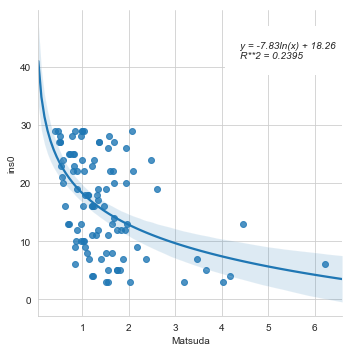

Spearman rho : -0.4524148310946647 2.294813830223542e-06


In [24]:
r, p = scipy. stats.spearmanr(np.column_stack((fake_df['Matsuda'].tolist(), fake_df['ins0'].tolist())))
correl_graph(fake_df, 'Matsuda', 'ins0')
plt.show()
print("Spearman rho : "+str(r), p)

### AUC Insulin x Matsuda graph with a log regression. Spearman correlation also calculated

C:\Users\Daph\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


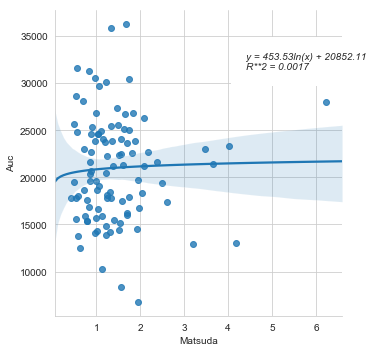

Spearman rho : 0.0352719504609915 0.7275447687618743


In [25]:
r, p = scipy. stats.spearmanr(np.column_stack((fake_df['Matsuda'].tolist(), fake_df['Auc'].tolist())))
correl_graph(fake_df, 'Matsuda', 'Auc')
plt.show()
print("Spearman rho : "+str(r), p)